## overview

In [1]:
# default package
import dataclasses as dc
import logging
import os
import pathlib
import random
import sys
import tempfile
from urllib.request import urlretrieve

import IPython

In [2]:
# third party package
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib.font_manager import FontProperties
from sklearn import linear_model
from tqdm import tqdm

In [3]:
# my package
sys.path.append(os.path.join(pathlib.Path().resolve(), "../"))

In [4]:
# reload settings
%load_ext autoreload
%autoreload 2

In [5]:
# logger
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [6]:
# graph setting
sns.set()
font_path = "/usr/share/fonts/truetype/migmix/migmix-1p-regular.ttf"
font_prop = FontProperties(fname=font_path)
matplotlib.rcParams["font.family"] = font_prop.get_name()

## ポアソン回帰(理論)

ポアソン回帰は一般化線形モデルの一種です。
一般化線形モデルは、説明変数$\bf x$から目的変数$y$を下記の式で予測するモデルです。

$$
    g(\pi)=\beta_0+\sum \beta_ix_i
$$
$$
    \pi=E[Y]
$$
ここで、$g$はリンク関数です。また、$Y$は指数型分布族の確率分布に従います。

ポアソン回帰では、リンク関数を$g(\pi)=\log \pi$とし, $Y$はポアソン分布に従うとします。対数尤度関数は、
$$
\log \prod_i \left(e^{-\pi_i}\frac{\pi_i^{y_i}}{y_i!}\right)
$$
となるので、これを最大化する母数を推定します(最尤推定)。

## ポアソン回帰(実装)

In [7]:
## generate data
x = np.random.uniform(0, 2, size=100)
x = np.sort(x)
beta = 1
beta_0 = 1
pi = np.exp(beta * x + beta_0)
y = np.random.poisson(lam=pi)

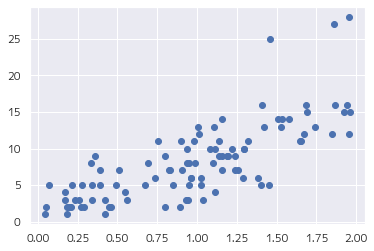

In [8]:
plt.scatter(x, y)

In [9]:
x_with_const = sm.add_constant(x)
model = sm.GLM(y, x_with_const, family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -249.17
Date:                Wed, 19 May 2021   Deviance:                       123.69
Time:                        14:54:33   Pearson chi2:                     125.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0513      0.092     11.441      0.000       0.871       1.231
x1             0.9562      0.069     13.819      0.000       0.821       1.092
==============================================================================
"""

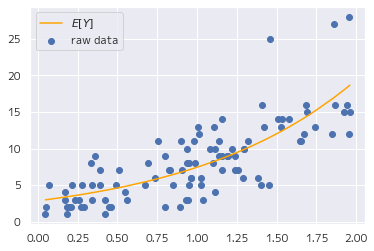

In [10]:
plt.scatter(x, y, label="raw data")
y_pred = np.exp(result.params[0] + result.params[1] * x)
plt.plot(x, y_pred, color="orange", label="$E[Y]$")
plt.legend()